Import libraries¶
**texto en negrita**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import warnings
from scipy import stats
import folium
from IPython.display import display
from geopy.geocoders import Nominatim

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

warnings.filterwarnings("ignore")

In [2]:
def plot_missing_values(df):
    # Calculate the number of missing values in each column
    missing_values = df.isna().sum()

    # Filter columns with missing values
    missing_values = missing_values[missing_values > 0]

    # Sort columns by the number of missing values in descending order
    missing_values = missing_values.sort_values(ascending=False)

    # Create a bar chart to visualize missing values
    plt.figure(figsize=(10, 6))
    missing_values.plot(kind='bar')
    plt.xlabel('Columns')
    plt.ylabel('Missing Values')
    plt.title('Missing Values In Each Column')
    plt.xticks(rotation=90)
    plt.show()

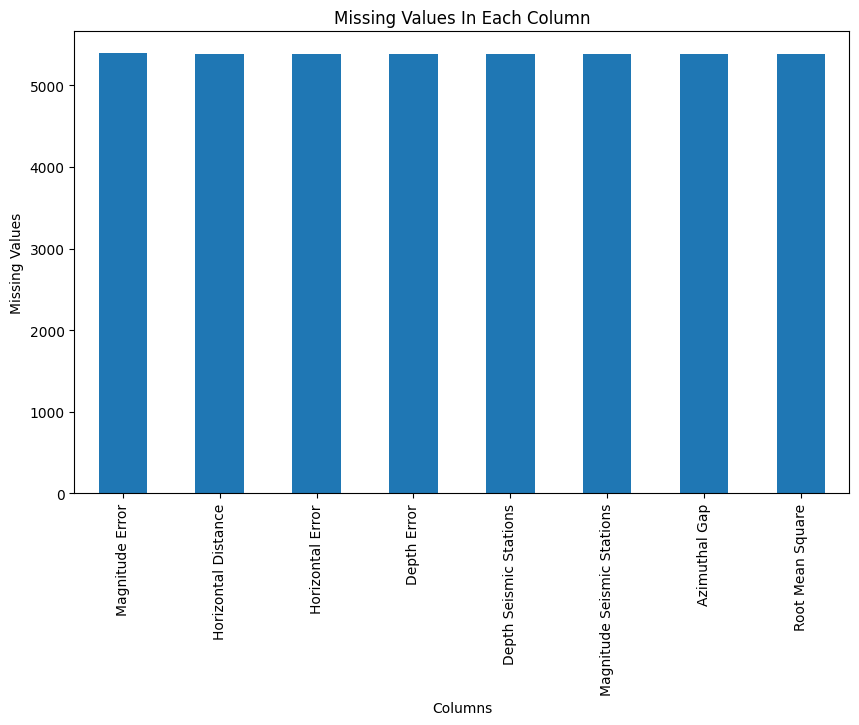

In [3]:
df=pd.read_csv("database.csv")
plot_missing_values(df)

In [4]:
df.sample(8)


Date      Time  Latitude  Longitude        Type  Depth  \
391   03/20/1966  09:04:25   -21.176   -174.429  Earthquake   25.0   
5035  12/23/1978  05:10:51    -8.254    121.492  Earthquake   33.0   
4716  03/12/1978  16:13:13   -30.677   -178.137  Earthquake   37.0   
3032  02/20/1974  03:02:54   -30.043    -68.590  Earthquake  115.0   
2180  12/19/1971  07:50:29    56.005    162.830  Earthquake   27.5   
498   08/16/1966  18:02:36    37.380   -114.157  Earthquake   10.0   
1803  01/04/1971  03:59:12   -29.644   -111.835  Earthquake   10.0   
3796  01/22/1976  08:07:10    44.388    149.617  Earthquake   44.0   

      Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
391           NaN                     NaN        5.6             MW  ...   
5035          NaN                     NaN        5.8             MB  ...   
4716          NaN                     NaN        5.5             MB  ...   
3032          NaN                     NaN        5.5             MB  ...   
2180          NaN                     NaN        5.5             MW  ...   
498           NaN                     NaN        5.7             MW  ...   
1803          NaN                     NaN        5.7             MW  ...   
3796          NaN                     NaN        5.6             MS  ...   

      Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
391                          NaN            NaN                  NaN   
5035                         NaN            NaN                  NaN   
4716                         NaN            NaN                  NaN   
3032                         NaN            NaN                  NaN   
2180                         NaN            NaN                  NaN   
498                          NaN            NaN                  NaN   
1803                         NaN            NaN                  NaN   
3796                         NaN            NaN                  NaN   

      Horizontal Error  Root Mean Square            ID  Source  \
391                NaN               NaN  ISCGEM849416  ISCGEM   
5035               NaN               NaN    USP0000Y1R      US   
4716               NaN               NaN    USP0000TC3      US   
3032               NaN               NaN    USP00005BR      US   
2180               NaN               NaN  ISCGEM777891  ISCGEM   
498                NaN               NaN  ISCGEM844550  ISCGEM   
1803               NaN               NaN  ISCGEM787894  ISCGEM   
3796               NaN               NaN    USP0000EN0      US   

     Location Source Magnitude Source     Status  
391           ISCGEM           ISCGEM  Automatic  
5035              US               US   Reviewed  
4716              US               US   Reviewed  
3032              US               US   Reviewed  
2180          ISCGEM           ISCGEM  Automatic  
498           ISCGEM           ISCGEM  Automatic  
1803          ISCGEM           ISCGEM  Automatic  
3796              US               US   Reviewed  

[8 rows x 21 columns]

In [5]:
df.describe()


Latitude    Longitude        Depth  Depth Error  \
count  5407.000000  5407.000000  5407.000000    21.000000   
mean      5.941818    52.656736    70.669951    24.832714   
std      30.424150   121.137237   112.470519    12.484733   
min     -66.448000  -179.991000     0.000000     0.360000   
25%     -15.061500   -68.887500    25.000000    31.610000   
50%      -0.007000   122.075000    33.000000    31.610000   
75%      34.005000   147.118500    59.000000    31.610000   
max      85.992000   179.960000   690.000000    31.610000   

       Depth Seismic Stations    Magnitude  Magnitude Error  \
count               23.000000  5407.000000        15.000000   
mean                25.347826     5.910351         0.206600   
std                 24.739752     0.430216         0.099458   
min                  0.000000     5.500000         0.055000   
25%                 13.000000     5.600000         0.124000   
50%                 17.000000     5.800000         0.188000   
75%                 23.500000     6.100000         0.267000   
max                 95.000000     8.700000         0.410000   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
count                   23.000000      23.000000            17.000000   
mean                     5.043478     238.691304             1.054943   
std                      4.456642      79.952946             0.722901   
min                      0.000000      79.000000             0.052250   
25%                      0.000000     212.500000             0.313600   
50%                      6.000000     260.000000             1.415000   
75%                      8.000000     264.500000             1.476000   
max                     13.000000     360.000000             2.641000   

       Horizontal Error  Root Mean Square  
count         20.000000         24.000000  
mean          69.912000          0.792417  
std           45.616974          0.971020  
min            0.150000          0.005000  
25%            6.742500          0.305250  
50%           99.000000          0.405000  
75%           99.000000          0.902500  
max           99.000000          3.440000

<Axes: xlabel='Magnitude'>

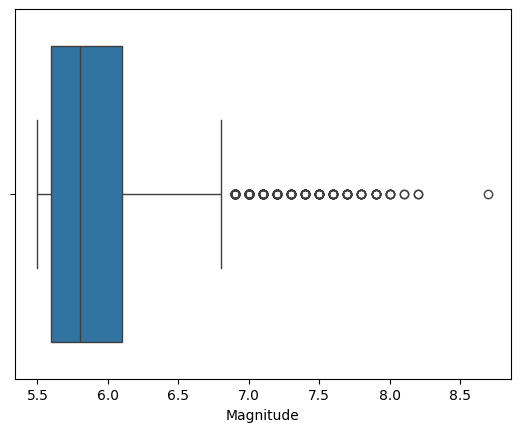

In [6]:
sns.boxplot(x=df['Magnitude'])


<Axes: xlabel='Magnitude', ylabel='Density'>

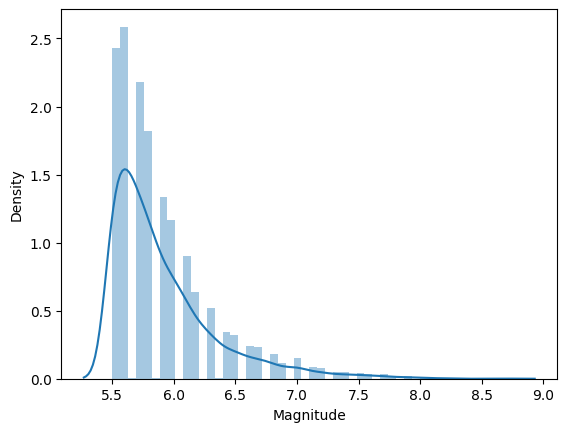

In [7]:
sns.distplot(df['Magnitude'])


**KMean Clustering**

In [8]:
data=df.copy()
data.sample(3)

Date      Time  Latitude  Longitude        Type  Depth  \
1401  10/01/1969  19:53:15   -60.793    -19.785  Earthquake   10.0   
5044  01/08/1979  07:27:05    -4.169    135.989  Earthquake   33.0   
3573  08/03/1975  11:59:21   -15.645    -75.106  Earthquake   15.0   

      Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
1401          NaN                     NaN        5.7             MW  ...   
5044          NaN                     NaN        5.5             MB  ...   
3573          NaN                     NaN        5.9             MS  ...   

      Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
1401                         NaN            NaN                  NaN   
5044                         NaN            NaN                  NaN   
3573                         NaN            NaN                  NaN   

      Horizontal Error  Root Mean Square            ID  Source  \
1401               NaN               NaN  ISCGEM802980  ISCGEM   
5044               NaN               NaN    USP0000YBA      US   
3573               NaN               NaN    USP0000CAS      US   

     Location Source Magnitude Source     Status  
1401          ISCGEM           ISCGEM  Automatic  
5044              US               US   Reviewed  
3573              US               US   Reviewed  

[3 rows x 21 columns]

In [9]:
data_num = df.select_dtypes(include = ['float64', 'int64'])
data_num

Latitude  Longitude  Depth  Depth Error  Depth Seismic Stations  \
0       19.246    145.616  131.6          NaN                     NaN   
1        1.863    127.352   80.0          NaN                     NaN   
2      -20.579   -173.972   20.0          NaN                     NaN   
3      -59.076    -23.557   15.0          NaN                     NaN   
4       11.938    126.427   15.0          NaN                     NaN   
...        ...        ...    ...          ...                     ...   
5402     6.058    126.469   54.0          NaN                     NaN   
5403    51.324    156.671  112.0          NaN                     NaN   
5404     5.672    126.038  112.0          NaN                     NaN   
5405   -14.690    167.224  165.0          NaN                     NaN   
5406    33.494     57.191   33.0          NaN                     NaN   

      Magnitude  Magnitude Error  Magnitude Seismic Stations  Azimuthal Gap  \
0           6.0              NaN                         NaN            NaN   
1           5.8              NaN                         NaN            NaN   
2           6.2              NaN                         NaN            NaN   
3           5.8              NaN                         NaN            NaN   
4           5.8              NaN                         NaN            NaN   
...         ...              ...                         ...            ...   
5402        5.8              NaN                         NaN            NaN   
5403        5.6              NaN                         NaN            NaN   
5404        5.7              NaN                         NaN            NaN   
5405        5.5              NaN                         NaN            NaN   
5406        5.9              NaN                         NaN            NaN   

      Horizontal Distance  Horizontal Error  Root Mean Square  
0                     NaN               NaN               NaN  
1                     NaN               NaN               NaN  
2                     NaN               NaN               NaN  
3                     NaN               NaN               NaN  
4                     NaN               NaN               NaN  
...                   ...               ...               ...  
5402                  NaN               NaN               NaN  
5403                  NaN               NaN               NaN  
5404                  NaN               NaN               NaN  
5405                  NaN               NaN               NaN  
5406                  NaN               NaN               NaN  

[5407 rows x 12 columns]

<Axes: xlabel='Depth', ylabel='Density'>

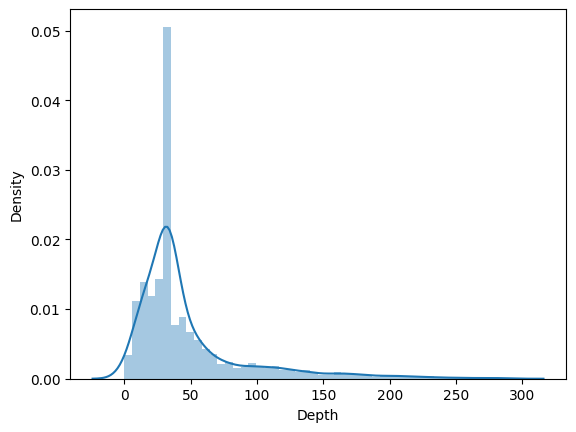

In [10]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(data_num))

# Define a Z-score threshold (e.g., 2 for a 95% confidence interval)
z_threshold = 2

# Identify and remove outliers


outliers = np.where(z_scores > z_threshold)
cleaned_data = data_num[~(z_scores > z_threshold)]

sns.distplot(cleaned_data['Depth'])

<Axes: xlabel='Magnitude', ylabel='Density'>

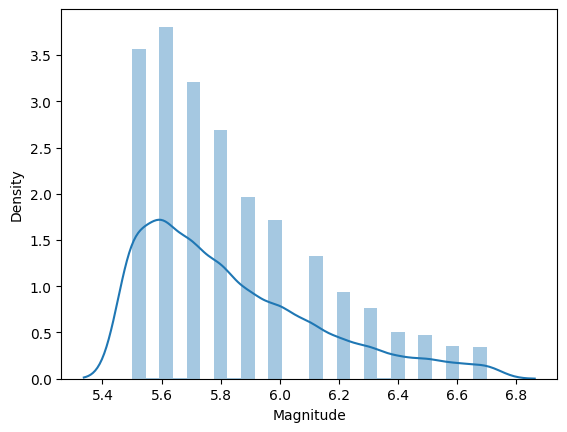

In [11]:
sns.distplot(cleaned_data['Magnitude'])


<Axes: xlabel='Depth', ylabel='Density'>

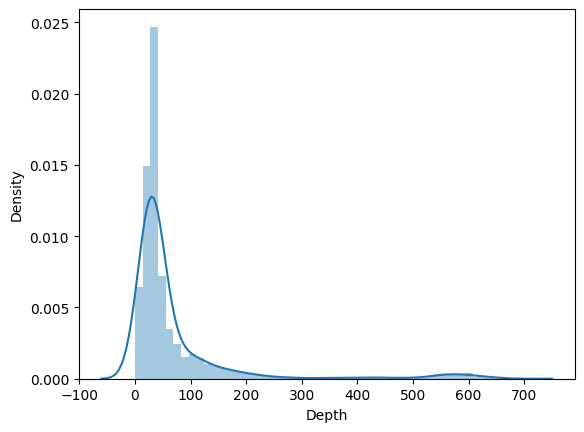

In [12]:
sns.distplot(data['Depth'])


In [13]:
data['Depth'].min()


0.0

<Axes: xlabel='Depth', ylabel='Density'>

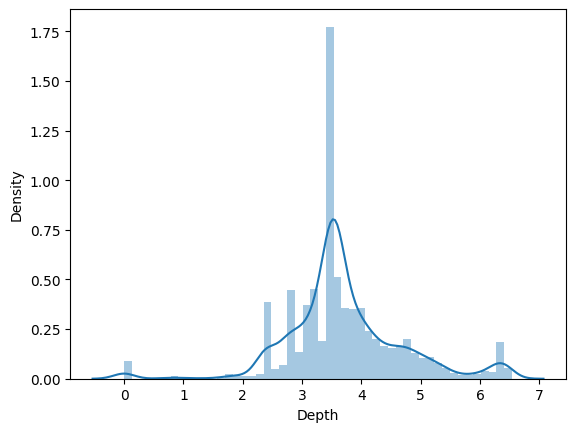

In [14]:
data['Depth']=np.log(data['Depth']-data['Depth'].min()+1)
sns.distplot(data['Depth'])

<Axes: xlabel='Magnitude', ylabel='Density'>

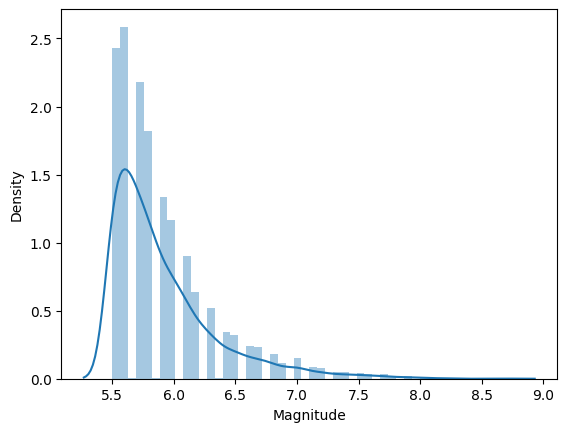

In [15]:
sns.distplot(data['Magnitude'])


<Axes: xlabel='Magnitude', ylabel='Density'>

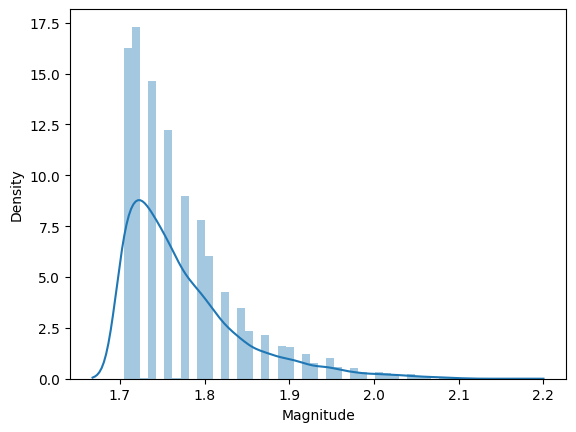

In [16]:
data['Magnitude']=np.log(data['Magnitude'])
sns.distplot(data['Magnitude'])

In [43]:
data = pd.get_dummies(data=data,drop_first=True,dtype='i')
data.sample(2)

Latitude  Longitude  Depth  Depth Error  Depth Seismic Stations  \
3391    -2.444    126.145   33.0          NaN                     NaN   
4013     7.384    -77.991   33.0          NaN                     NaN   

      Magnitude  Magnitude Error  Magnitude Seismic Stations  Azimuthal Gap  \
3391        6.6              NaN                         NaN            NaN   
4013        5.6              NaN                         NaN            NaN   

      Horizontal Distance  ...  Location Source_US  Magnitude Source_1020  \
3391                  NaN  ...                   1                      0   
4013                  NaN  ...                   1                      0   

      Magnitude Source_BRK  Magnitude Source_CI  Magnitude Source_GCMT  \
3391                     0                    0                      0   
4013                     0                    0                      0   

      Magnitude Source_ISCGEM  Magnitude Source_NC  Magnitude Source_OFFICIAL  \
3391                        0                    0                          0   
4013                        0                    0                          0   

      Magnitude Source_US  Status_Reviewed  
3391                    1                1  
4013                    1                1  

[2 rows x 13899 columns]

KMean Clustering¶


In [23]:
# Imputar valores NaN con la media de las columnas
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Aplicar KMeans
lo_inirtia = []
for i in range(1, 20):
    km = KMeans(n_clusters=i)
    km.fit(data_imputed)
    print(i, km.inertia_)
    lo_inirtia.append(km.inertia_)

1 84563437.68296522
2 14817633.97465153
3 9707991.926122086
4 7012271.680405181
5 5421215.084568813
6 4296617.641702865
7 3368258.542378283
8 2591714.861347585
9 2300945.16504502
10 2026912.5599799044
11 1857177.5002006814
12 1713474.2644329555
13 1569073.4124454833
14 1448126.3013741188
15 1353071.7643085625
16 1242298.2514978012
17 1121658.7844457934
18 1038207.4602225507
19 967052.4867020273


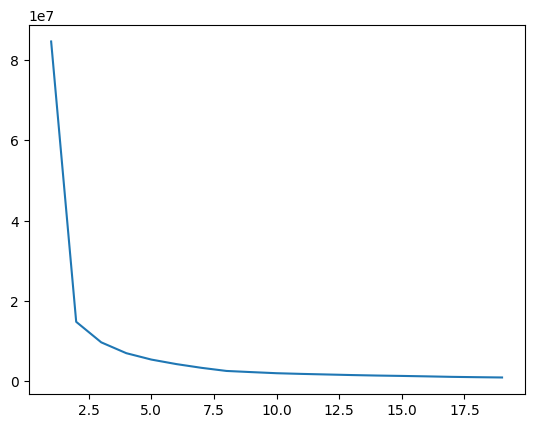

In [24]:
plt.plot(range(1,20),lo_inirtia)


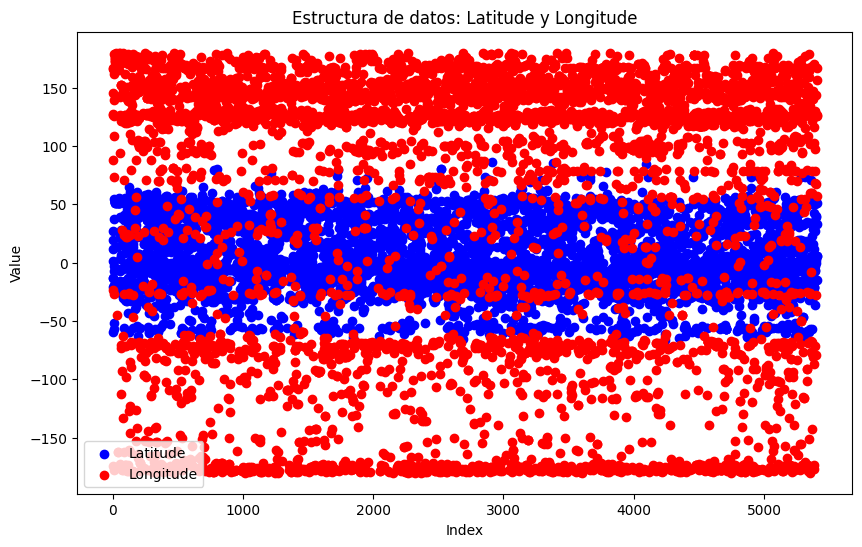

In [40]:
import matplotlib.pyplot as plt

# Graficar las primeras filas de los datos para entender su estructura
plt.figure(figsize=(10, 6))

# Ejemplo de cómo graficar una columna (ajusta según tus columnas de interés)
plt.scatter(data.index, data['Latitude'], color='blue', label='Latitude')
plt.scatter(data.index, data['Longitude'], color='red', label='Longitude')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Estructura de datos: Latitude y Longitude')
plt.legend()
plt.show()


In [42]:
print(data.head())


         Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                   

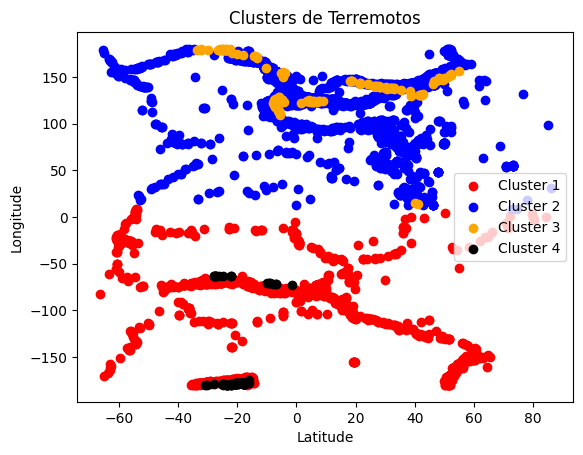

In [44]:
# Imputar valores NaN con la media de las columnas
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Aplicar KMeans
km = KMeans(n_clusters=4)
prediction = km.fit_predict(data_imputed)

# Obtener índices de cada cluster
cluster_indices = [np.where(prediction == i)[0] for i in range(4)]

# Visualizar los clusters en función de Latitude y Longitude
colors = ['red', 'blue', 'orange', 'black']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

for i, indices in enumerate(cluster_indices):
    plt.scatter(data.loc[indices, 'Latitude'], data.loc[indices, 'Longitude'], color=colors[i], label=labels[i])

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clusters de Terremotos')
plt.legend()
plt.show()

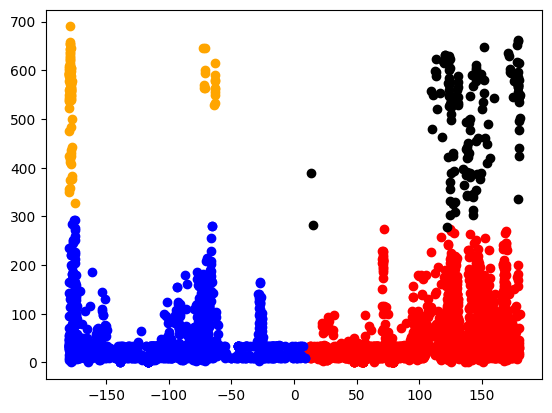

In [45]:
# Imputar valores NaN con la media de las columnas
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Aplicar KMeans
km = KMeans(n_clusters=4)
prediction = km.fit_predict(data_imputed)

# Graficar los clusters en función de las columnas 1 y 2 (ajusta según tus datos)
plt.scatter(data.iloc[prediction == 0, 1], data.iloc[prediction == 0, 2], color='red', label='Cluster 1')
plt.scatter(data.iloc[prediction == 1, 1], data.iloc[prediction == 1, 2], color='blue', label='Cluster 2')
plt.scatter(data.iloc[prediction == 2, 1], data.iloc[prediction == 2, 2], color='orange', label='Cluster 3')
plt.scatter(data.iloc[prediction == 3, 1], data.iloc[prediction == 3, 2], color='black', label='Cluster 4')


In [46]:
cluster_stats = df.copy()
cluster_stats['Cluster'] = prediction
cluster_stats.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  Azimuthal Gap  \
0                     NaN        6.0             MW  ...            NaN   
1                     NaN        5.8             MW  ...            NaN   
2                     NaN        6.2             MW  ...            NaN   
3                     NaN        5.8             MW  ...            NaN   
4                     NaN        5.8             MW  ...            NaN   

   Horizontal Distance  Horizontal Error  Root Mean Square            ID  \
0                  NaN               NaN               NaN  ISCGEM860706   
1                  NaN               NaN               NaN  ISCGEM860737   
2                  NaN               NaN               NaN  ISCGEM860762   
3                  NaN               NaN               NaN  ISCGEM860856   
4                  NaN               NaN               NaN  ISCGEM860890   

   Source Location Source Magnitude Source     Status Cluster  
0  ISCGEM          ISCGEM           ISCGEM  Automatic       0  
1  ISCGEM          ISCGEM           ISCGEM  Automatic       0  
2  ISCGEM          ISCGEM           ISCGEM  Automatic       1  
3  ISCGEM          ISCGEM           ISCGEM  Automatic       1  
4  ISCGEM          ISCGEM           ISCGEM  Automatic       0  

[5 rows x 22 columns]

<Axes: >

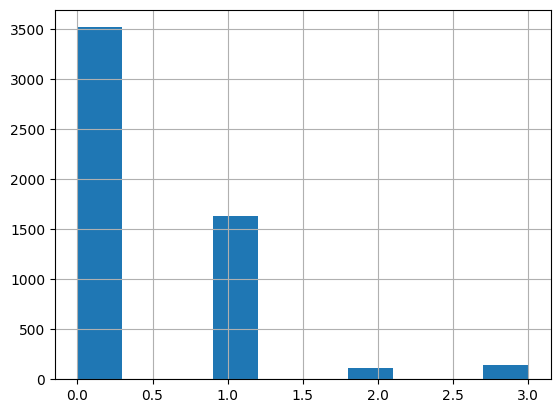

In [47]:
cluster_stats['Cluster'].hist()


**Visualización de histograma de clúster**
El código proporcionado genera un histograma para visualizar la distribución de puntos de datos dentro de cada grupo después de aplicar una técnica de agrupación.

In [48]:
cluster_stats['Cluster'].value_counts()


Cluster
0    3520
1    1631
3     144
2     112
Name: count, dtype: int64

In [49]:
cluster_stats[cluster_stats['Cluster']==1].describe()


Latitude   Longitude        Depth  Depth Error  \
count  1631.000000  1631.00000  1631.000000    21.000000   
mean     -5.495860  -108.09912    47.680946    24.832714   
std      35.158428    55.83128    45.838717    12.484733   
min     -66.448000  -179.98500     0.000000     0.360000   
25%     -30.120500  -173.22750    20.000000    31.610000   
50%     -15.555000   -97.33700    33.000000    31.610000   
75%      17.013000   -69.41250    52.000000    31.610000   
max      84.289000     8.76600   292.000000    31.610000   

       Depth Seismic Stations    Magnitude  Magnitude Error  \
count               23.000000  1631.000000        15.000000   
mean                25.347826     5.908749         0.206600   
std                 24.739752     0.429964         0.099458   
min                  0.000000     5.500000         0.055000   
25%                 13.000000     5.600000         0.124000   
50%                 17.000000     5.800000         0.188000   
75%                 23.500000     6.100000         0.267000   
max                 95.000000     8.100000         0.410000   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
count                   23.000000      23.000000            17.000000   
mean                     5.043478     238.691304             1.054943   
std                      4.456642      79.952946             0.722901   
min                      0.000000      79.000000             0.052250   
25%                      0.000000     212.500000             0.313600   
50%                      6.000000     260.000000             1.415000   
75%                      8.000000     264.500000             1.476000   
max                     13.000000     360.000000             2.641000   

       Horizontal Error  Root Mean Square  Cluster  
count         20.000000         23.000000   1631.0  
mean          69.912000          0.779043      1.0  
std           45.616974          0.990581      0.0  
min            0.150000          0.005000      1.0  
25%            6.742500          0.286500      1.0  
50%           99.000000          0.390000      1.0  
75%           99.000000          0.730000      1.0  
max           99.000000          3.440000      1.0

***Cluster-Specific Earthquake Map¶***

In [50]:
filtered_data=cluster_stats[cluster_stats['Cluster']==0]
m = folium.Map(location=[0, 0], zoom_start=2)

# Add earthquake markers
for index, row in filtered_data.iterrows():
    lat, lon, magnitude = row['Latitude'], row['Longitude'], row['Magnitude']
    folium.CircleMarker(location=[lat, lon], radius=2, color='red', fill=True, fill_color='red', fill_opacity=0.4, popup=f"Magnitude: {magnitude}").add_to(m)
m

**Mapa de terremotos específico del cúmulo**
El siguiente código crea un mapa interactivo utilizando Folium para mostrar marcadores de terremotos para puntos de datos que pertenecen a un grupo específico. En este caso, nos centramos en el grupo 0 del análisis de agrupamiento.

In [51]:
filtered_data=cluster_stats[cluster_stats['Cluster']==1]
m = folium.Map(location=[0, 0], zoom_start=2)

# Add earthquake markers
for index, row in filtered_data.iterrows():
    lat, lon, magnitude = row['Latitude'], row['Longitude'], row['Magnitude']
    folium.CircleMarker(location=[lat, lon], radius=2, color='red', fill=True, fill_color='red', fill_opacity=0.4, popup=f"Magnitude: {magnitude}").add_to(m)
m

Mapa de terremotos específico del cúmulo¶
El siguiente código crea un mapa interactivo utilizando Folium para mostrar marcadores de terremotos para puntos de datos que pertenecen a un grupo específico. En este caso, nos centramos en el grupo 1 del análisis de agrupamiento.

In [52]:
filtered_data=cluster_stats[cluster_stats['Cluster']==2]
m = folium.Map(location=[0, 0], zoom_start=2)

# Add earthquake markers
for index, row in filtered_data.iterrows():
    lat, lon, magnitude = row['Latitude'], row['Longitude'], row['Magnitude']
    folium.CircleMarker(location=[lat, lon], radius=2, color='red', fill=True, fill_color='red', fill_opacity=0.4, popup=f"Magnitude: {magnitude}").add_to(m)
m

Mapa de terremotos específico del cúmulo
El siguiente código crea un mapa interactivo utilizando Folium para mostrar marcadores de terremotos para puntos de datos que pertenecen a un grupo específico. En este caso, nos centramos en el grupo 2 del análisis de agrupamiento.

In [53]:
filtered_data=cluster_stats[cluster_stats['Cluster']==3]
m = folium.Map(location=[0, 0], zoom_start=2)

# Add earthquake markers
for index, row in filtered_data.iterrows():
    lat, lon, magnitude = row['Latitude'], row['Longitude'], row['Magnitude']
    folium.CircleMarker(location=[lat, lon], radius=2, color='red', fill=True, fill_color='red', fill_opacity=0.4, popup=f"Magnitude: {magnitude}").add_to(m)
m

Resumen del análisis de datos de terremotos¶
En este análisis, exploramos datos de terremotos, buscando comprender y categorizar la actividad sísmica según su ubicación, magnitud y profundidad. El análisis implicó principalmente agrupar los datos del terremoto en cuatro grupos distintos, cada uno de los cuales ofrece información sobre patrones y características sísmicas específicas.

Agrupación de datos de terremotos
Método de agrupación: aplicamos técnicas de agrupación para segmentar los datos del terremoto en cuatro grupos. La agrupación es un enfoque de análisis de datos que agrupa puntos de datos similares, lo que nos permite discernir patrones dentro de los datos.

Interpretación de los conglomerados: Los cuatro conglomerados representan diferentes patrones sísmicos, cada uno con su propia región geográfica y atributos específicos.

Características del grupo
Grupo 1: Japón, China, Indonesia, Malasia, Australia, Mar del Coral
Distribución geográfica: El grupo 1 se caracteriza por terremotos que ocurren en las regiones de Japón, China, Indonesia, Malasia, Australia y el Mar del Coral. Estas áreas son conocidas por sus características geológicas dinámicas y límites de placas tectónicas.

Rango de magnitud: los terremotos en este grupo generalmente exhiben un rango de magnitud específico de las condiciones geológicas de estas regiones.

Características de profundidad: Los terremotos en este grupo tienden a tener características de profundidad asociadas con las interacciones tectónicas en las áreas descritas.

Grupo 2: América del Sur y Atlántico
Distribución geográfica: El grupo 2 abarca la actividad sísmica en América del Sur y el Océano Atlántico adyacente, regiones conocidas por sus interacciones tectónicas.

Rango de magnitud: Los terremotos en este grupo generalmente tienen un rango de magnitud que refleja la dinámica geológica en América del Sur y el océano circundante.

Características de profundidad: el rango de profundidad de los terremotos en este grupo está influenciado por la placa tectónica sudamericana y sus interacciones.

Grupo 3: África, resto de Asia y Europa
Distribución geográfica: el grupo 3 representa la actividad sísmica en África y el resto de Asia y Europa. Estas regiones se caracterizan por sus diversos paisajes geológicos.

Rango de magnitud: Los terremotos dentro de este grupo generalmente caen dentro del rango de magnitud que refleja las complejas estructuras geológicas de la región.

Características de profundidad: el rango de profundidad de los terremotos en este grupo está vinculado a las condiciones geológicas que se encuentran en África, Asia y Europa.

Grupo 4: América del Este, Nueva Zelanda, Océano Pacífico Norte y Sur
Distribución geográfica: el grupo 4 incluye actividad sísmica en las regiones de América del Este, Nueva Zelanda y los Océanos Pacífico Norte y Sur. Estas áreas son conocidas por sus características tectónicas y volcánicas únicas.

Rango de magnitud: los terremotos dentro de este grupo generalmente caen dentro del rango de magnitud relacionado con las características geológicas de América del Este, Nueva Zelanda y el Océano Pacífico.

Características de profundidad: el rango de profundidad de los terremotos en este grupo está influenciado por las condiciones geológicas específicas de estas regiones.

Perspectivas e implicaciones
Comprensión geoespacial: a través de la agrupación, obtuvimos una mejor comprensión de la distribución geográfica de los terremotos dentro de cada grupo. Esta información puede ser valiosa para evaluar el riesgo y la preparación ante terremotos en regiones específicas.

Análisis de magnitud y profundidad: la agrupación también proporcionó información sobre las características típicas de magnitud y profundidad de los terremotos dentro de cada grupo. Esto puede resultar útil para estudios sismológicos y estrategias de preparación.

Decisiones basadas en datos: el análisis de conglomerados nos permite tomar decisiones y predicciones basadas en datos relacionadas con la actividad sísmica, ya que ahora podemos categorizar los terremotos en grupos significativos con características distintas.

En resumen, el análisis de agrupaciones de datos de terremotos en cuatro grupos ha proporcionado información valiosa sobre la distribución geoespacial, la magnitud y las características de profundidad de los eventos sísmicos en Japón, China, Indonesia, Malasia, Australia, el Mar del Coral, América del Sur y el Océano Atlántico. , África, Asia, Europa, América del Este, Nueva Zelanda y el Océano Pacífico Norte y Sur. Estos conocimientos se pueden utilizar para diversas aplicaciones, incluida la evaluación del riesgo de terremotos, la preparación y la investigación científica.